In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
# Everything BUT the sales column
X = df.drop('sales',axis=1)
# Only sales column
y = df['sales']

In [19]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

In [23]:
test_predictions = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
print("MAE: ",mean_absolute_error(y_test,test_predictions))
print("MSE: ",mean_squared_error(y_test,test_predictions))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE:  0.48967980448035886
MSE:  0.44175055104033895
RMSE:  0.6646431757269


In [26]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [27]:
train_rmse_errors,test_rmse_errors

([1.734594124329376,
  0.5879574085292234,
  0.43393443569020657,
  0.35170836883993556,
  0.2509342923789987,
  0.19369221791234445,
  5.421702222223523,
  0.144845189557325,
  0.1718750825536122],
 [1.5161519375993877,
  0.6646431757269,
  0.5803286825219469,
  0.5077742640851456,
  2.575819388953378,
  4.305081148058944,
  1379.1039756834016,
  4195.748925810836,
  95144.67926018221])

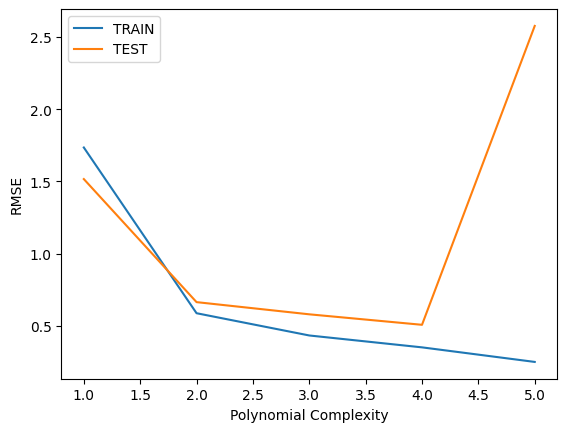

In [28]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

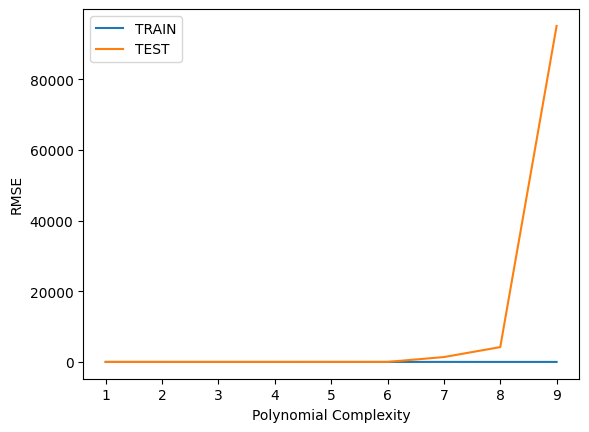

In [29]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

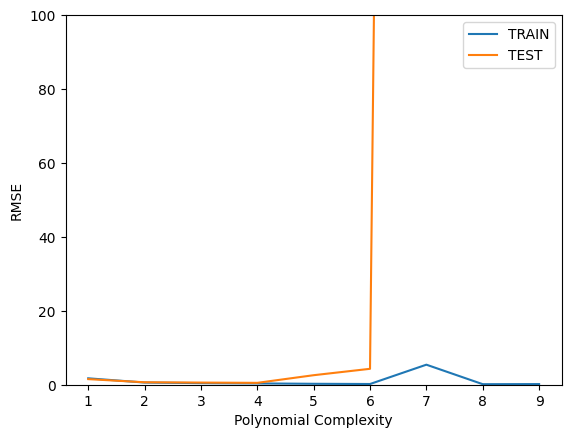

In [30]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()